## Raw sins, comapre HF-LF-Tinker:


summary_stats | 10/20/2025 02:48:43 PM | Rank 0 | INFO  |  loading from L2_hmfs_0.5_narrow_no_merge.hdf5
summary_stats | 10/20/2025 02:48:43 PM | Rank 0 | INFO  |  loading from L2_hmfs_0.5_narrow_no_merge.hdf5
summary_stats | 10/20/2025 02:48:43 PM | Rank 0 | INFO  |  loading from L2_hmfs_0.5_narrow_no_merge.hdf5
summary_stats | 10/20/2025 02:48:43 PM | Rank 0 | INFO  |  loading from L2_hmfs_0.5_narrow_no_merge.hdf5
summary_stats | 10/20/2025 02:48:43 PM | Rank 0 | INFO  |  loading from L2_hmfs_0.5_narrow_no_merge.hdf5
summary_stats | 10/20/2025 02:48:43 PM | Rank 0 | INFO  |  loading from L2_hmfs_0.5_narrow_no_merge.hdf5
summary_stats | 10/20/2025 02:48:43 PM | Rank 0 | INFO  |  loading from L2_hmfs_0.5_narrow_no_merge.hdf5
summary_stats | 10/20/2025 02:48:43 PM | Rank 0 | INFO  |  loading from L2_hmfs_0.5_narrow_no_merge.hdf5
summary_stats | 10/20/2025 02:48:43 PM | Rank 0 | INFO  |  loading from L2_hmfs_0.5_narrow_no_merge.hdf5
summary_stats | 10/20/2025 02:48:43 PM | Rank 0 | INFO 

/tmp/ipykernel_518581/1574191686.py:71: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax_i.set_ylim(-5, -1)
/tmp/ipykernel_518581/1574191686.py:69: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax_i.legend(fontsize=10, frameon=False)


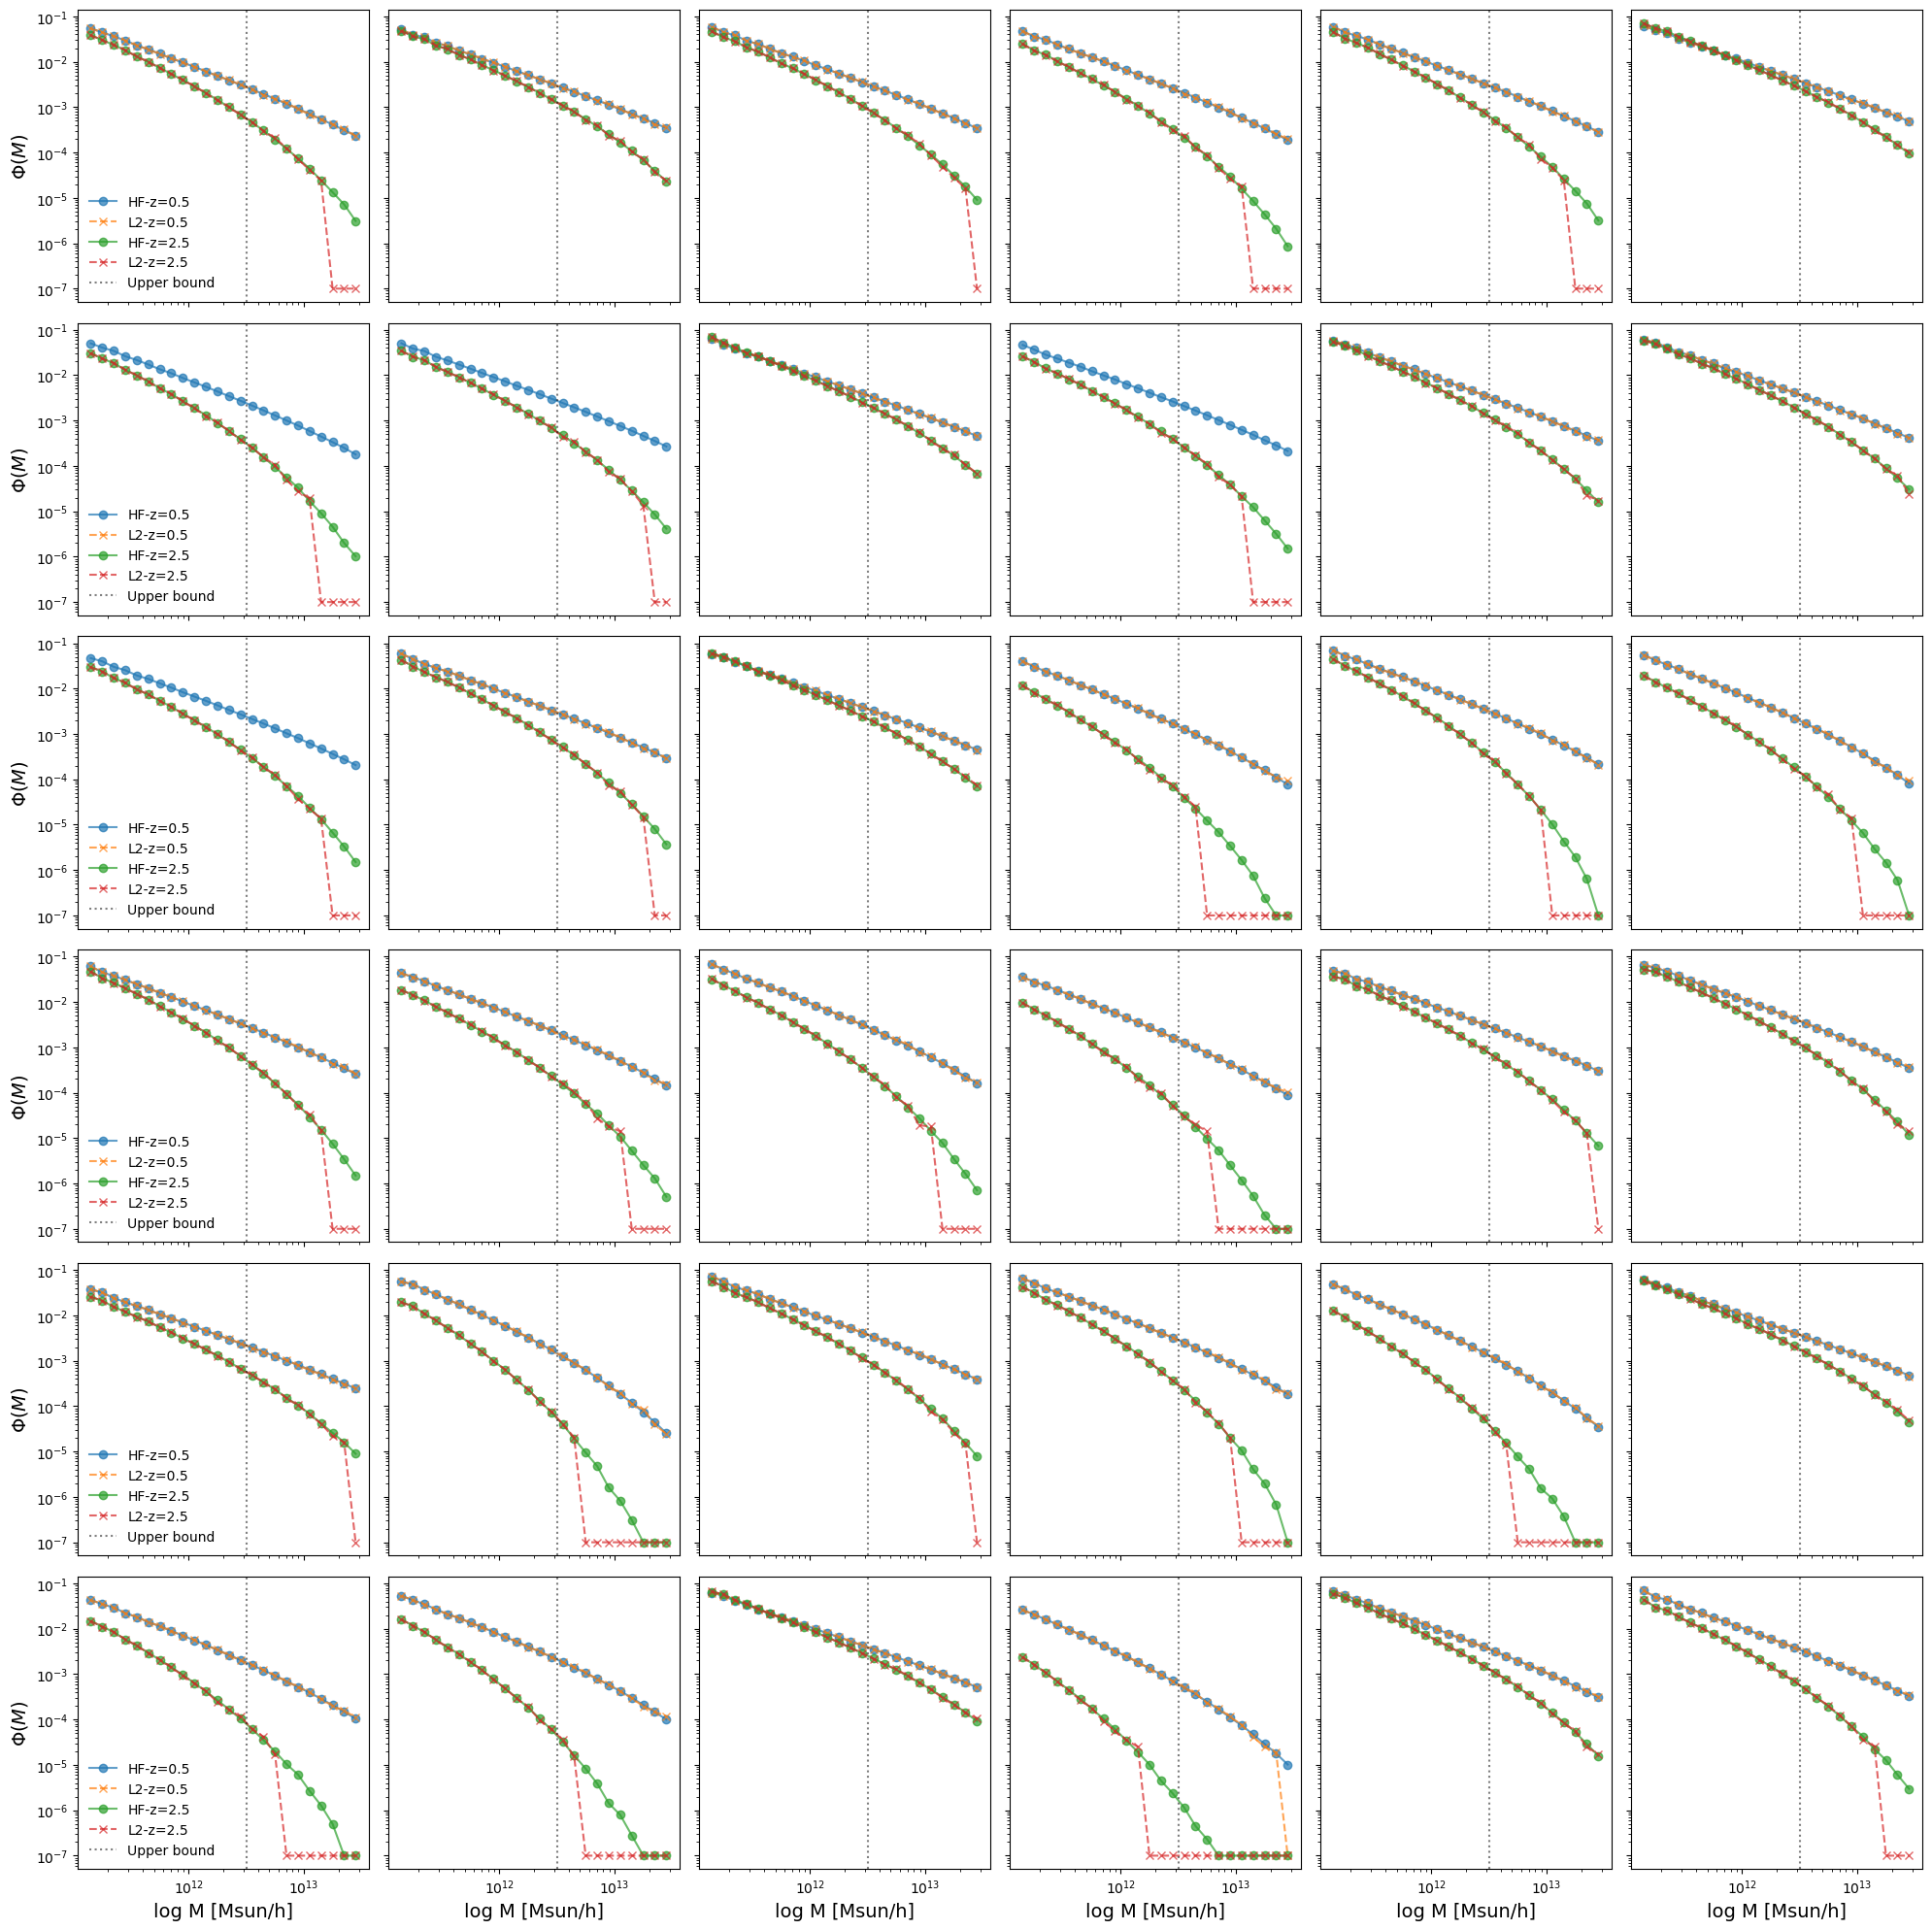

In [4]:
import matplotlib.pyplot as plt
import numpy as np

from gal_goku import summary_stats

data_dir = f'/home/qezlou/HD2/HETDEX/cosmo/data/'
mass_range = (11.1, 13.5)




fig, ax = plt.subplots(6, 6, figsize=(20, 20), sharex=True, sharey=True)
plt.subplots_adjust(wspace=0, hspace=0)  # Set spacing between axes to zero

for z in [0.5, 2.5]:
    paired_sims = {'log_hmf_l2': [], 'log_hmf_hf': [], 'sim_ids': []}
    for narrow in [True, False]:
        hmf_l2 = summary_stats.HMF(data_dir, fid='L2', z=z, narrow=narrow, mass_range=mass_range)
        hmf_hf = summary_stats.HMF(data_dir, fid='HF', z=z, narrow=narrow, mass_range=mass_range)
        mbins, log_hmfs_l2, _, _, sim_tags_l2 = hmf_l2.get_wt_err()
        mbins, log_hmfs_hf, _, _, sim_tags_hf = hmf_hf.get_wt_err()

        sim_ids_hf = [int(stg[-11:-7]) if narrow else int(stg[-4::]) for stg in sim_tags_hf]
        sim_ids_l2 = [int(stg[-11:-7]) if narrow else int(stg[-4::]) for stg in sim_tags_l2]

        for sid in sim_ids_hf:
            paired_sims['sim_ids'].append(sid)
            paired_sims['log_hmf_hf'].append(log_hmfs_hf[sim_ids_hf.index(sid)])
            try:
                paired_sims['log_hmf_l2'].append(log_hmfs_l2[sim_ids_l2.index(sid)])
            except ValueError:
                paired_sims['log_hmf_l2'].append(np.full_like(mbins, np.nan))
                
            
    for i in range(len(paired_sims['sim_ids'])):
        ax_i = ax[i // 6, i % 6]
        if i%6 == 0:
            label_hf = f'HF-z={z}'
            label_l2 = f'L2-z={z}'
        else:
            label_hf = None
            label_l2 = None
        ax_i.plot(10**mbins, 10**paired_sims['log_hmf_hf'][i], label=label_hf, marker='o', ls='solid', alpha=0.7)
        ax_i.plot(10**mbins, 10**paired_sims['log_hmf_l2'][i], label=label_l2, marker='x', ls='--', alpha=0.7)
        ax_i.set_xlabel('log M [Msun/h]', fontsize=14)
        # Only show y label on column 0
        if i % 6 == 0:  # If this subplot is in the first column
            ax_i.set_ylabel(r'$\Phi(M)$', fontsize=14)
        else:
            ax_i.set_ylabel('')
        # only show x label on last row
        if i // 6 == 5:  # If this subplot is in the last
            ax_i.set_xlabel('log M [Msun/h]', fontsize=14)
        else:
            ax_i.set_xlabel('')
            
        #ax_i.set_title(f'Simulation ID: {paired_sims["sim_ids"][i]} i = {i}', fontsize=16)
for i in range(36):

    ax_i = ax[i // 6, i % 6]
    ax_i.set_yscale('log')
    ax_i.set_xscale('log')
    # Add a vertical line at x=10**12.35
    if i % 6 == 0:
        bound_label = 'Upper bound'
    else:
        bound_label = None
    ax_i.axvline(x=10**12.5, color='black', linestyle=':', alpha=0.5, label=bound_label)
    ax_i.legend(fontsize=10, frameon=False)
    #ax_i.grid()
    ax_i.set_ylim(-5, -1)
fig.tight_layout()
fig.savefig(f'/home/qezlou/HD2/HETDEX/draft/gal-emu-paper/figures/hmf_l2_vs_hf_comparison.pdf', bbox_inches='tight')